### Задание:

Используя тестовые данные рассчитайте 5 метрик. Для каждой метрики:
* Посчитайте среднее
* Посчитайте медиану
* Посчитайте 95-персентиль
* Визуализируйте распределение частотным графиком и “ящиком с усами”.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_dataframe.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101500 non-null  int64  
 1   user_id            101500 non-null  int64  
 2   hour               101500 non-null  int64  
 3   os                 101500 non-null  object 
 4   order_class        101500 non-null  object 
 5   surge              91431 non-null   object 
 6   app_opened         101500 non-null  int64  
 7   price_seen         101500 non-null  int64  
 8   order_made         101500 non-null  int64  
 9   ride_completed     101500 non-null  int64  
 10  user_cancelled     101500 non-null  int64  
 11  city_center_order  101500 non-null  int64  
 12  distance           91431 non-null   float64
 13  age                101500 non-null  int64  
 14  rfm                101500 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1

In [4]:
df.describe()

,Unnamed: 0,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age
count,101500.000000,101500.000000,101500.000000,101500.0,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,91431.000000,101500.000000
mean,50749.500000,549874.802207,11.481429,1.0,0.900798,0.731389,0.620365,0.111025,0.571675,5.371152,25.906384
std,29300.670499,258600.104176,6.917522,0.0,0.298934,0.443239,0.485299,0.314164,0.494838,4.118531,7.838328
min,0.000000,100093.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010946,18.000000
25%,25374.750000,328223.000000,5.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.438335,20.000000
50%,50749.500000,548827.000000,11.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,4.279565,24.000000
75%,76124.250000,773051.000000,17.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,7.129814,29.000000
max,101499.000000,999978.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,40.268966,69.000000


In [5]:
df.head(5)

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low


**Расчет метрик.**


*Час заказа*

In [6]:
df_hour = df[['hour', 'order_made']]
df_hour = df_hour[df_hour['order_made']>=1]
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74236 entries, 0 to 101499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hour        74236 non-null  int64
 1   order_made  74236 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB


In [7]:
# среднее значение
df_hour['hour'].mean()

11.376246026186756

In [8]:
# медиана
df_hour['hour'].median()

11.0

In [9]:
# 95-персентиль
df_hour['hour'].quantile(q=0.95)

22.0

(array([3214., 3212., 3249., 3214., 3324., 3334., 3207., 2729., 2566.,
        2662., 3218., 3220., 3250., 3312., 3200., 3205., 3147., 3207.,
        3265., 2609., 2714., 2752., 3235., 3191.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

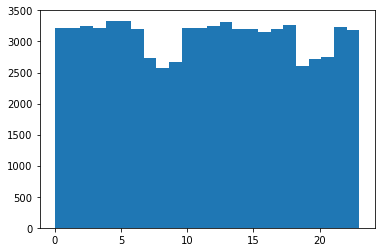

In [10]:
# гистограмма
plt.hist(df_hour['hour'], bins=24)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bca236b130>,
 'caps': [<matplotlib.lines.Line2D at 0x2bca236b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bca2359df0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bca236bc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bca236bf40>],
 'means': []}

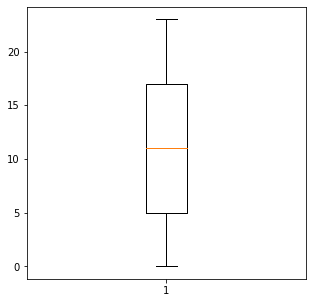

In [11]:
# ящик с усами
fig = plt.figure(figsize=(5, 5))
plt.boxplot(df_hour['hour'])

*Дистанция*

In [12]:
df_distance = df[['distance', 'order_made']]
df_distance = df_distance[df_distance['order_made']>=1]
df_distance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74236 entries, 0 to 101499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    74236 non-null  float64
 1   order_made  74236 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [13]:
# среднее значение
df_distance['distance'].mean()

5.367276962171612

In [14]:
# медиана
df_distance['distance'].median()

4.2687265259992895

In [15]:
# 95-персентиль
df_distance['distance'].quantile(q=0.95)

13.76902444579496

(array([3.3269e+04, 2.4866e+04, 9.7160e+03, 3.9330e+03, 1.6290e+03,
        5.6300e+02, 1.8500e+02, 6.6000e+01, 6.0000e+00, 3.0000e+00]),
 array([1.09464561e-02, 3.84823243e+00, 7.68551841e+00, 1.15228044e+01,
        1.53600904e+01, 1.91973763e+01, 2.30346623e+01, 2.68719483e+01,
        3.07092343e+01, 3.45465202e+01, 3.83838062e+01]),
 <BarContainer object of 10 artists>)

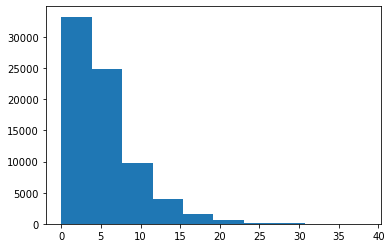

In [16]:
# гистограмма
plt.hist(df_distance['distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bca2451dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bca245f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bca2451ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bca245f940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bca245fc10>],
 'means': []}

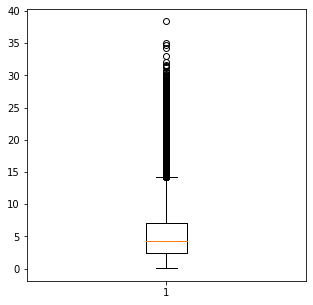

In [17]:
# ящик с усами
fig = plt.figure(figsize=(5, 5))
plt.boxplot(df_distance['distance'])

*Возраст*

In [18]:
df_age=df[['user_id', 'age']].drop_duplicates()
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24224 entries, 0 to 101488
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  24224 non-null  int64
 1   age      24224 non-null  int64
dtypes: int64(2)
memory usage: 567.8 KB


In [19]:
# среднее значение
df_age['age'].mean()

27.852130118890358

In [20]:
# медиана
df_age['age'].median()

25.0

In [21]:
# 95-пересентиль
df_age['age'].quantile(q=0.95)

48.0

(array([10364.,  5195.,  3207.,  2104.,  1329.,   878.,   583.,   378.,
          117.,    69.]),
 array([18. , 23.1, 28.2, 33.3, 38.4, 43.5, 48.6, 53.7, 58.8, 63.9, 69. ]),
 <BarContainer object of 10 artists>)

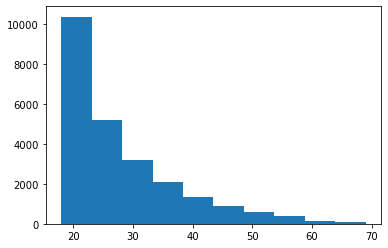

In [22]:
# гистограмма
plt.hist(df_age['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bca2536f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2bca25464f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bca2536c40>],
 'medians': [<matplotlib.lines.Line2D at 0x2bca2546a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bca2546d60>],
 'means': []}

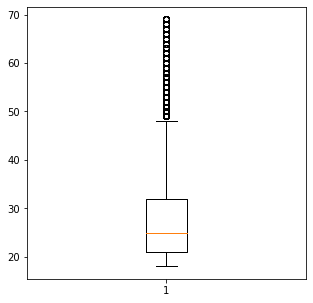

In [23]:
# ящик с усами
fig = plt.figure(figsize=(5, 5))
plt.boxplot(df_age['age'])

*Дистанция заказов из центра города*

In [24]:
df_centre = df[['order_made', 'city_center_order', 'distance']]
df_centre = df_centre[((df_centre['city_center_order']>=1) & (df_centre['order_made']>=1))]
df_centre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44491 entries, 1 to 101496
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_made         44491 non-null  int64  
 1   city_center_order  44491 non-null  int64  
 2   distance           44491 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [25]:
# среднее значение
df_centre['distance'].mean()

5.381569331682024

In [26]:
# медиана
df_centre['distance'].median()

4.300468766684748

In [27]:
# 95-персентиль
df_centre['distance'].quantile(q=0.95)

13.733723588341704

(array([1.7704e+04, 1.5226e+04, 6.5910e+03, 2.8430e+03, 1.3030e+03,
        5.3600e+02, 1.8600e+02, 6.7000e+01, 2.9000e+01, 6.0000e+00]),
 array([2.57613011e-02, 3.49858501e+00, 6.97140873e+00, 1.04442324e+01,
        1.39170562e+01, 1.73898799e+01, 2.08627036e+01, 2.43355273e+01,
        2.78083510e+01, 3.12811747e+01, 3.47539984e+01]),
 <BarContainer object of 10 artists>)

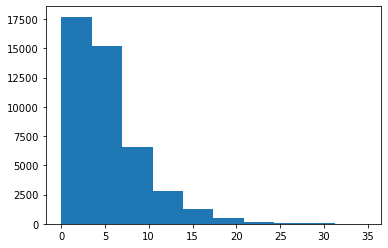

In [28]:
# гистограмма
plt.hist(df_centre['distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bca261d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bca261ddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bca261d520>],
 'medians': [<matplotlib.lines.Line2D at 0x2bca262b3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bca262b670>],
 'means': []}

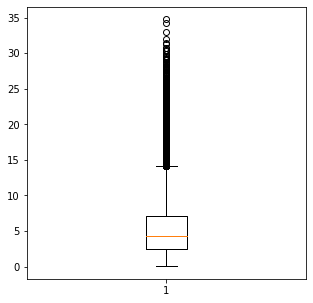

In [29]:
# ящик с усами
fig = plt.figure(figsize=(5, 5))
plt.boxplot(df_centre['distance'])

*Количество отменённых заказов на пользователя*

In [30]:
df_all_cancelled = df[['order_made', 'user_cancelled', 'user_id']]
df_all_cancelled = df_all_cancelled[((df_all_cancelled['order_made']>=1) & (df_all_cancelled['user_cancelled']>=1))]
df_all_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11269 entries, 22 to 101493
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   order_made      11269 non-null  int64
 1   user_cancelled  11269 non-null  int64
 2   user_id         11269 non-null  int64
dtypes: int64(3)
memory usage: 352.2 KB


In [31]:
df_cancelled = pd.pivot_table(df_all_cancelled, index='user_id', values='user_cancelled', aggfunc='count')

In [32]:
# среднее значение
df_cancelled['user_cancelled'].mean()

1.2461572487006525

In [33]:
# медиана
df_cancelled['user_cancelled'].median()

1.0

In [34]:
# 95-персентиль
df_cancelled['user_cancelled'].quantile(q=0.95)

2.0

(array([7.143e+03, 0.000e+00, 1.610e+03, 0.000e+00, 0.000e+00, 2.590e+02,
        0.000e+00, 2.600e+01, 0.000e+00, 5.000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

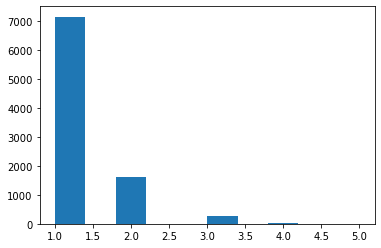

In [35]:
# гистограмма
plt.hist(df_cancelled['user_cancelled'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bca2717400>,
 'caps': [<matplotlib.lines.Line2D at 0x2bca27179a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bca2717130>],
 'medians': [<matplotlib.lines.Line2D at 0x2bca2717f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bca2723250>],
 'means': []}

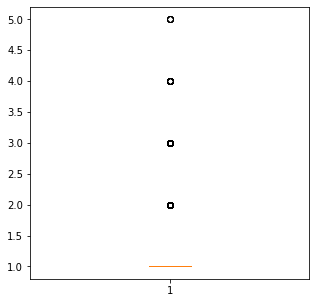

In [36]:
# ящик с усами
fig = plt.figure(figsize=(5, 5))
plt.boxplot(df_cancelled['user_cancelled'])